In [5]:
import folium
from matplotlib import cm
import pandas as pd

In [6]:
prefix = "train"

In [7]:
df = pd.read_csv("./data/" + prefix + "/combined.csv")

In [21]:
coords_nan = [(row.latitude, row.longitude) for _, row in df.iterrows()]
altitude_nan = [(row.altitude, row.altitude_delta) for _, row in df.iterrows()]
speeds_nan = [row.speed for _, row in df.iterrows()]
times_nan = [row.time for _, row in df.iterrows()]

coords = []
speeds = []
altitude = []
times = []

for i in range(len(coords_nan)):
	if str(coords_nan[i][0]) == "nan":
		continue

	coords += [coords_nan[i]]
	altitude += [altitude_nan[i]]
	speeds += [speeds_nan[i]]
	times += [times_nan[i]]

In [22]:
# rgb tuple to hexadecimal conversion
def rgb2hex(rgb):
    rgb = [hex(int(256*x)) for x in rgb]
    r, g, b = [str(x)[2:] for x in rgb]
    return f"#{r}{g}{b}"

In [9]:
# Defines the color mapping from speeds to rgba
color_mapper = cm.ScalarMappable(cmap=cm.cividis)
rgb_values = [c[:3] for c in color_mapper.to_rgba(speeds)] # keep rgb and drop the "a" column
colors = [rgb2hex(rgb) for rgb in rgb_values]

my_map = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=14) 

In [10]:
for point, color, speed, time in zip(coords, colors, speeds, times):
	folium.CircleMarker(location=point,
                        radius=1.25,
                        popup=str(time),
                        color=color).add_to(my_map)

In [ ]:
my_map

In [5]:
# (start, label)
labels = {
	"train": [
		("2023-12-29 08:45:00.215311000", "lift"),
		("2023-12-29 09:00:06.228473000", "piste"),
		("2023-12-29 09:02:50.231005000", "lift"),
		("2023-12-29 09:12:09.239907000", "piste"),
		("2023-12-29 09:17:00.244979000", "lift"),
		("2023-12-29 09:29:21.256954000", "piste"),
		("2023-12-29 09:34:14.262212000", "lift"),
		("2023-12-29 10:08:16.294629000", "piste"),
		("2023-12-29 10:15:02.301574000", "lift"),
		("2023-12-29 10:27:36.314336000", "piste"),
		("2023-12-29 10:33:30.320355000", "lift"),
		("2023-12-29 10:38:46.199841800", "piste"),
		("2023-12-29 10:42:27.010777900", "lift"),
		("2023-12-29 10:55:27.341284000", "piste"),
		("2023-12-29 11:02:14.862596600", "lift"),
		("2023-12-29 11:10:00.355146000", "piste"),
		("2023-12-29 11:11:07.356687000", "lift"),
		("2023-12-29 11:21:16.366608000", "piste"),
		("2023-12-29 11:26:54.372653000", "lift"),
		("2023-12-29 11:34:55.380479000", "piste"),
		("2023-12-29 11:38:52.384601000", "lift"),
		("2023-12-29 11:46:24.392286000", "piste"),
	],
	"test": [
		("2023-12-28 14:26:12.417131000", "piste"),
		("2023-12-28 14:36:45.424319000", "lift"),
		("2023-12-28 14:49:49.436701000", "piste"),
		("2023-12-28 14:50:45.437605000", "lift"),
		("2023-12-28 15:02:45.449214000", "piste"),
	]
}

In [6]:
df_label = df[['time', 'z', 'y', 'x', 'qz', 'qy', 'qx', 'qw', 'roll', 'pitch', 'yaw', 'seconds_elapsed', 'z_gyro', 'y_gyro', 'x_gyro', 'longitude', 'latitude']]
df_label = df_label[df['z'].notna()]

In [7]:
def label(timestamp):
	for i in range(len(labels[prefix])):
		if timestamp < labels[prefix][i][0]:
			return labels[prefix][i - 1][1] if i > 0 else "lift"
		elif i == len(labels[prefix]) - 1:
			return labels[prefix][-1][1]

In [8]:
i = 1
for _, row in df_label.iterrows():
	if str(row.z) == "nan":
		continue
	df_label.loc[i, "label"] = label(row.time)
	
	i += 1

In [9]:
df_label = df_label.dropna()

In [10]:
df_label.to_csv("./data/" + prefix + "/labelled.csv")

### Try to label the data based on algorithm

In [65]:
# try to label the data based on an algorithm
df["altitude_delta"] = df.iloc[::100]["altitude"].diff()
df["altitude_delta"].loc[0] = 0
df["altitude_delta"] = df["altitude_delta"].ffill()

/tmp/ipykernel_3216/2235496843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["altitude_delta"].loc[0] = 0


<AxesSubplot:ylabel='altitude_delta'>

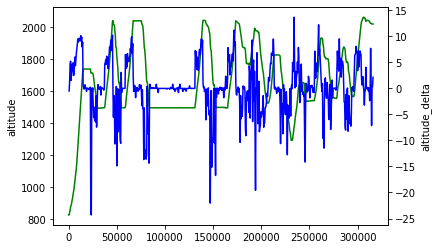

In [64]:
# show altitude delta and altitude

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df.iloc[::500]["altitude"], color="g")
ax2 = plt.twinx()
sns.lineplot(data=df.iloc[::500]["altitude_delta"], color="b", ax=ax2)

In [68]:
altitude_nan = [(row.altitude, row.altitude_delta) for _, row in df.iterrows()]
for i in range(len(coords_nan)):
	if str(coords_nan[i][0]) == "nan":
		continue

	coords += [coords_nan[i]]
	altitude += [altitude_nan[i]]
	speeds += [speeds_nan[i]]
	times += [times_nan[i]]

In [71]:
my_map = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=14)
i = 0
for point, alt, time in zip(coords, altitude, times):
    if i % 100 == 0:
        color = "#ffffff"
        if alt[1] > 0.001:
            color = "#ff0000" 
        elif alt[1] < -0.001:
            color = "#00ff00"
            
        folium.CircleMarker(location=point,
                            radius=1.25,
                            popup=str(time),
                            color=color).add_to(my_map)
    i+=1

In [72]:
my_map